In [36]:
import os
import warnings
import pandas as pd
from socceraction.data.statsbomb import StatsBombLoader
import socceraction.spadl as spadl
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.filterwarnings(action="ignore", message="credentials were not supplied. open data access only")

In [37]:
SBL = StatsBombLoader()

In [38]:
df_events = SBL.events(game_id=7548)
df_players = SBL.players(game_id=7548)

In [39]:
df_actions = spadl.statsbomb.convert_to_actions(df_events, home_team_id=781)

In [40]:
df_actions = (
  spadl
  .add_names(df_actions)  # add actiontype and result names
  .merge(SBL.teams(game_id=7548), how='left')  # add team names
  .merge(SBL.players(game_id=7548), how='left')  # add player names
)

In [41]:
throw_in_actions = df_actions[(df_actions['type_name'] == 'throw_in')]
throw_in_actions.shape

(27, 25)

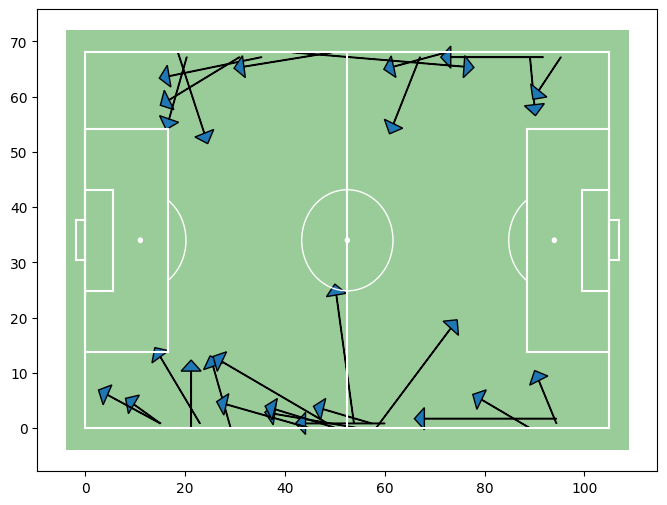

In [42]:
import matplotsoccer
import matplotlib.pyplot as plt

# 地味だけど、スローインの場所をプロットしたもの
matplotsoccer.field("green",figsize=8, show=False)
# plt.scatter(throw_in_actions['start_x'], throw_in_actions['start_y'])
# plt.arrow(throw_in_actions['start_x'], throw_in_actions['start_y'], throw_in_actions['end_x'], throw_in_actions['end_y'])
for index, item in throw_in_actions.iterrows():
    plt.arrow(item['start_x'], item['start_y'], item['end_x'] - item['start_x'], item['end_y'] - item['start_y'], width=0.1, head_width=4, head_length=2)
plt.axis("on")
plt.show()

In [43]:
df_competitions = SBL.competitions()

In [44]:
df_competitions.head(5)

season_id  competition_id  competition_name country_name  \
0          4              16  Champions League       Europe   
1          1              16  Champions League       Europe   
2          2              16  Champions League       Europe   
3         27              16  Champions League       Europe   
4         26              16  Champions League       Europe   

  competition_gender season_name  
0               male   2018/2019  
1               male   2017/2018  
2               male   2016/2017  
3               male   2015/2016  
4               male   2014/2015

In [45]:
df_competitions[df_competitions['competition_name'].str.contains('World')]

season_id  competition_id   competition_name   country_name  \
18        106              43     FIFA World Cup  International   
19          3              43     FIFA World Cup  International   
42         30              72  Women's World Cup  International   

   competition_gender season_name  
18               male        2022  
19               male        2018  
42             female        2019

In [46]:
df_games = SBL.games(competition_id=43, season_id=106).set_index("game_id")

In [47]:
df_games.shape

(64, 11)

In [48]:
df_games.head()

season_id  competition_id competition_stage  game_day  \
game_id                                                          
3857256        106              43       Group Stage         3   
3869151        106              43       Round of 16         4   
3857257        106              43       Group Stage         3   
3857258        106              43       Group Stage         1   
3857288        106              43       Group Stage         2   

                  game_date  home_team_id  away_team_id  home_score  \
game_id                                                               
3857256 2022-12-02 21:00:00           786           773           2   
3869151 2022-12-03 21:00:00           779           792           2   
3857257 2022-11-30 17:00:00           792           776           1   
3857258 2022-11-24 21:00:00           781           786           2   
3857288 2022-11-26 12:00:00           777           792           0   

         away_score                  venue                    referee  
game_id                                                                
3857256           3            Stadium 974  Fernando Andrés Rapallini  
3869151           1  Ahmad bin Ali Stadium           Szymon Marciniak  
3857257           0   Al Janoub Stadium              Mustapha Ghorbal  
3857258           0         Lusail Stadium            Alireza Faghani  
3857288           1   Al Janoub Stadium                Daniel Siebert

In [49]:
team_dic = {}
for index, game in df_games.iterrows():
    df_game_team = SBL.teams(game.name)
    team_dic[df_game_team.iloc[0,0]] = df_game_team.iloc[0,1]
    team_dic[df_game_team.iloc[1,0]] = df_game_team.iloc[1,1]
df_team = pd.DataFrame.from_dict(team_dic, orient='index')
df_team

0
773     Switzerland
786          Serbia
779       Argentina
792       Australia
776         Denmark
781          Brazil
777         Tunisia
787         Senegal
3565        Ecuador
941     Netherlands
791     South Korea
783         Uruguay
780        Portugal
788         Morocco
771          France
799    Saudi Arabia
794          Mexico
789          Poland
3566          Qatar
768         England
785         Croatia
772           Spain
778           Japan
1839  United States
770         Germany
2722       Cameroon
795      Costa Rica
782         Belgium
907           Wales
4885          Ghana
1833         Canada
797            Iran

In [50]:
df_games['home_team_name'] = df_games['home_team_id'].map(lambda x:team_dic[x])
df_games['away_team_name'] = df_games['away_team_id'].map(lambda x:team_dic[x])

In [51]:
temp_df_games = df_games.iloc[0:3, :]

----------------------------------------------
Serbia
1004


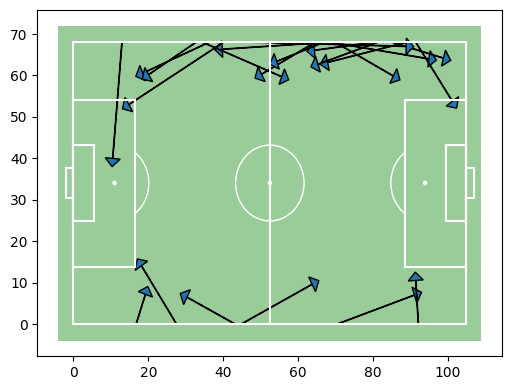

Switzerland
876


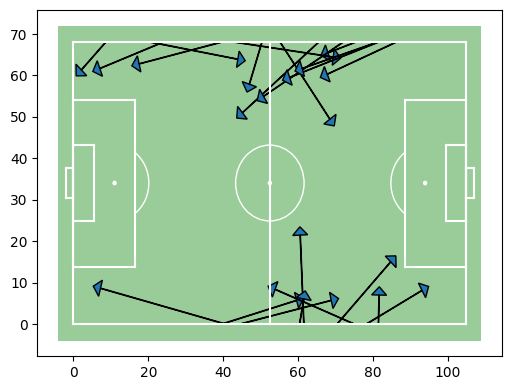

----------------------------------------------
Argentina
1516


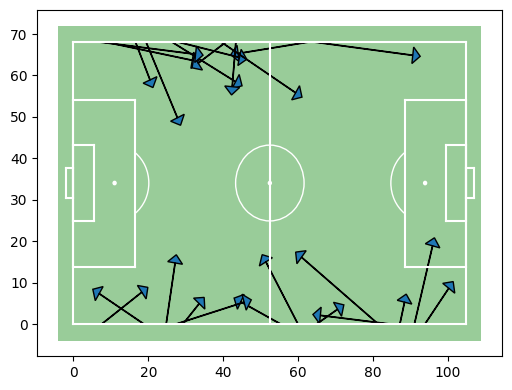

Australia
916


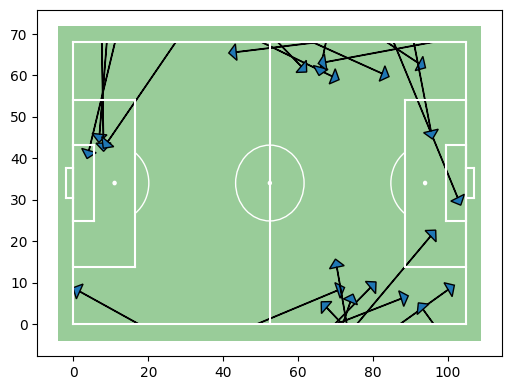

----------------------------------------------
Australia
702


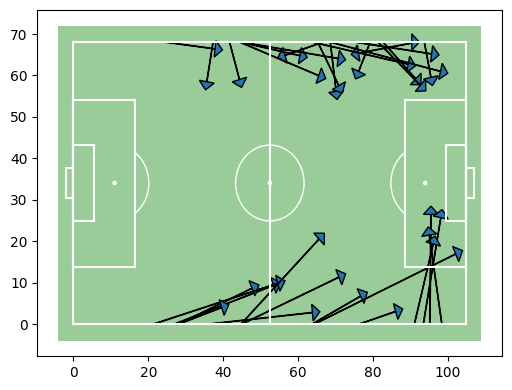

Denmark
1450


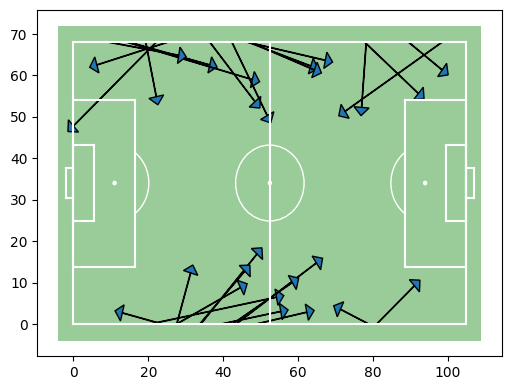

----------------------------------------------
Brazil
1308


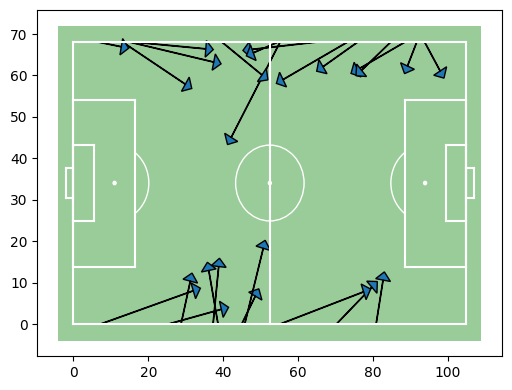

Serbia
903


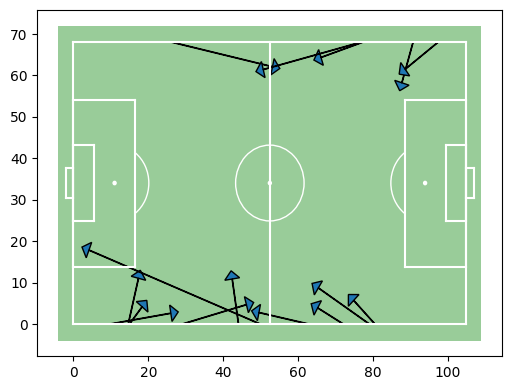

----------------------------------------------
Tunisia
1100


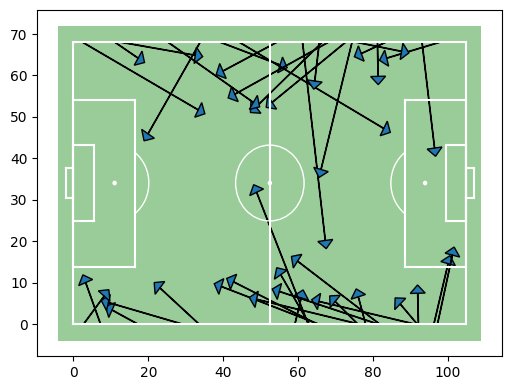

Australia
798


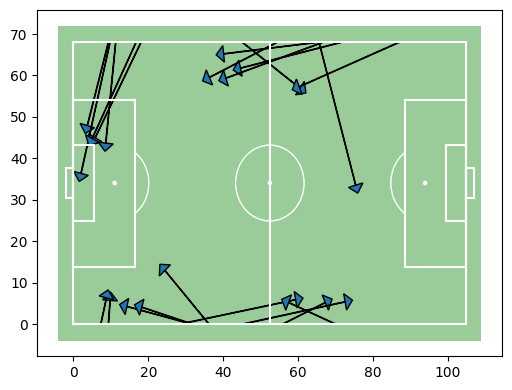

----------------------------------------------
Ecuador
939


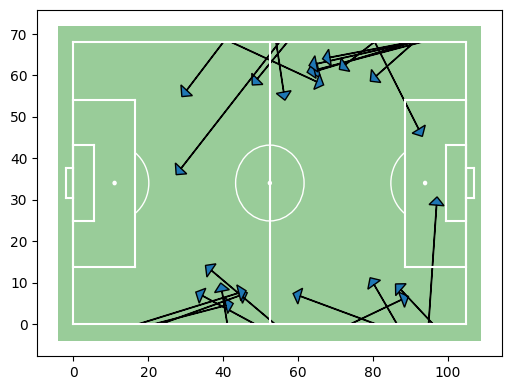

Senegal
672


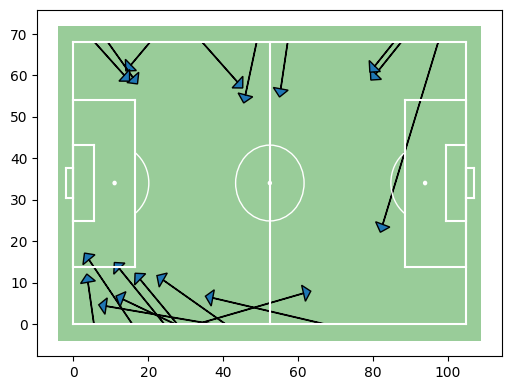

----------------------------------------------
Netherlands
1398


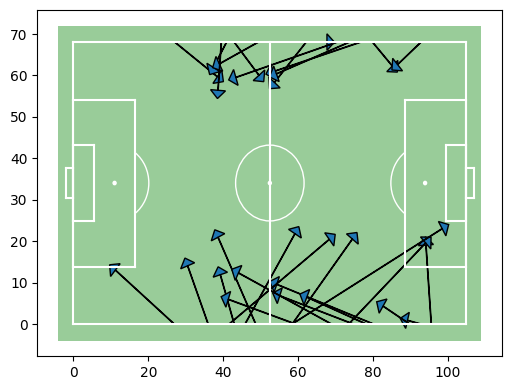

Argentina
1331


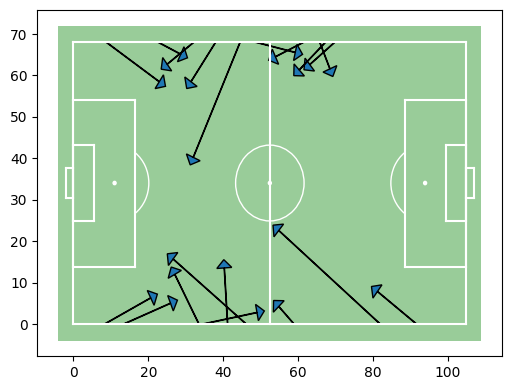

----------------------------------------------
Uruguay
1142


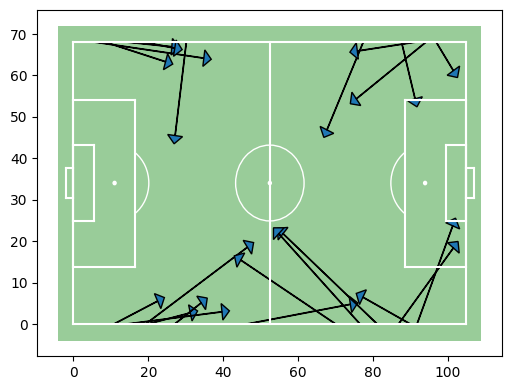

South Korea
956


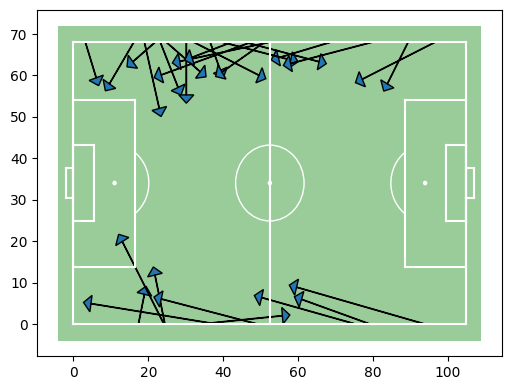

----------------------------------------------
Morocco
586


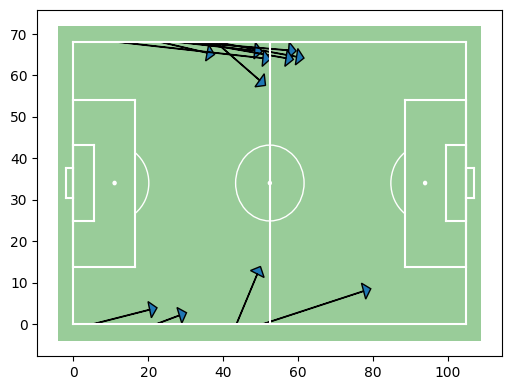

Portugal
1441


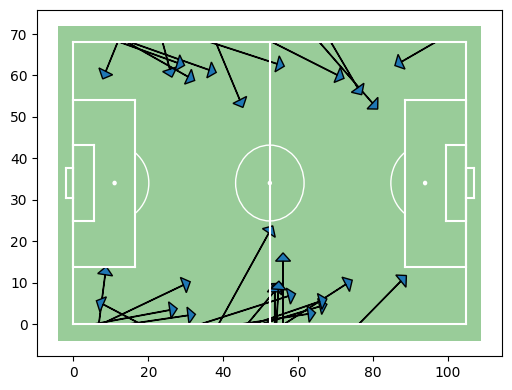

----------------------------------------------
Argentina
1392


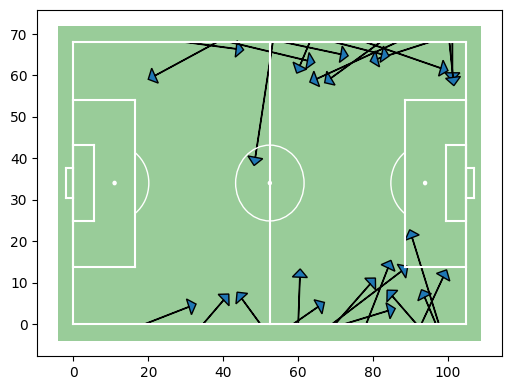

France
1195


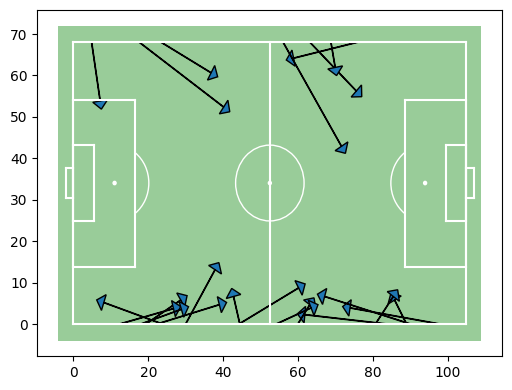

----------------------------------------------
Saudi Arabia
668


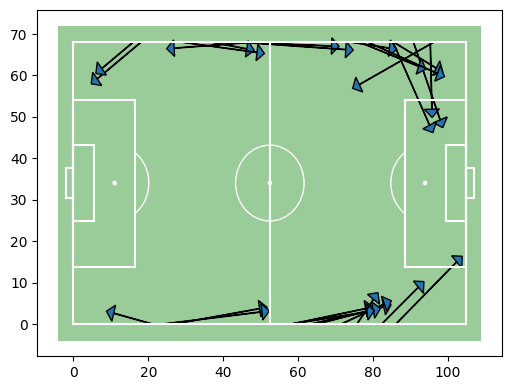

Mexico
998


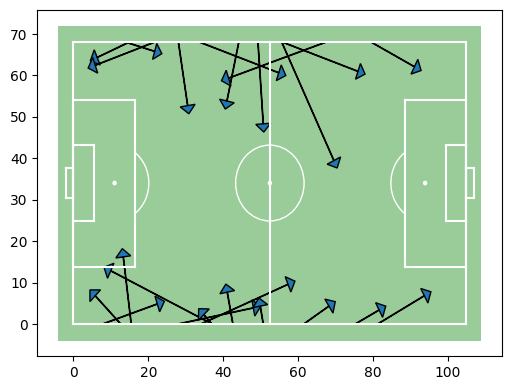

----------------------------------------------
Poland
681


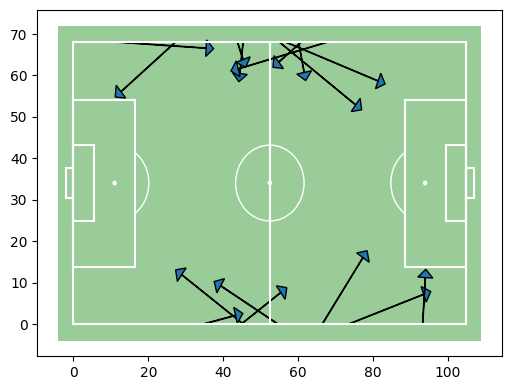

Argentina
1806


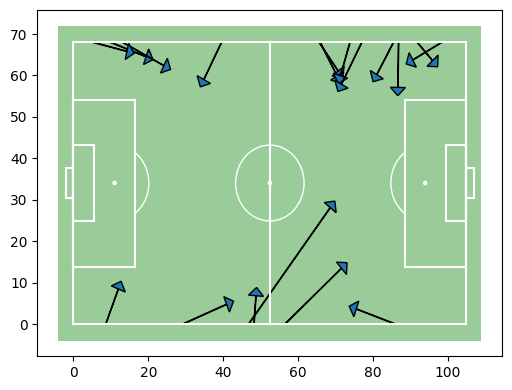

----------------------------------------------
France
1165


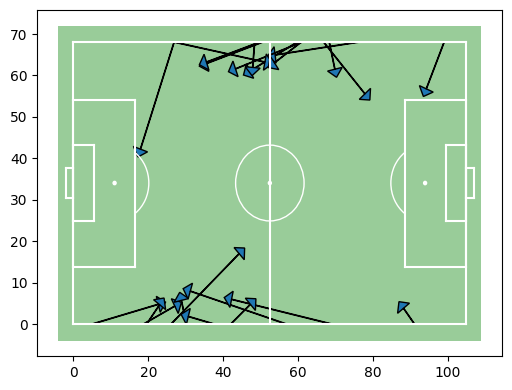

Denmark
1171


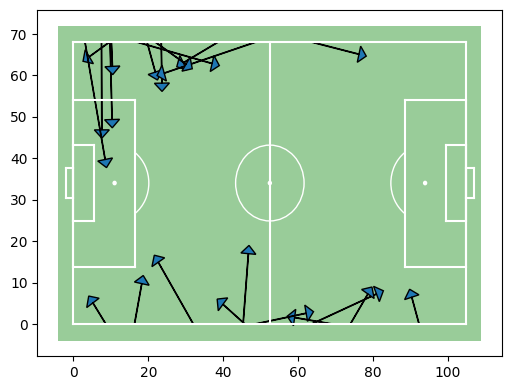

----------------------------------------------
Argentina
1133


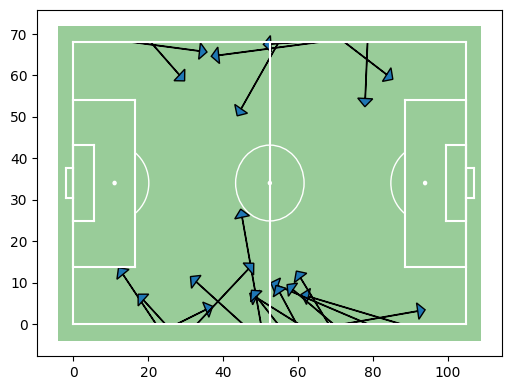

Mexico
820


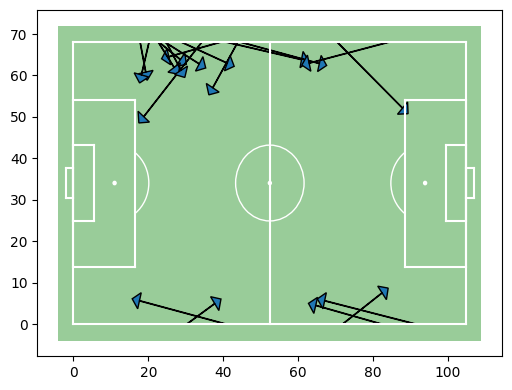

----------------------------------------------
Brazil
1255


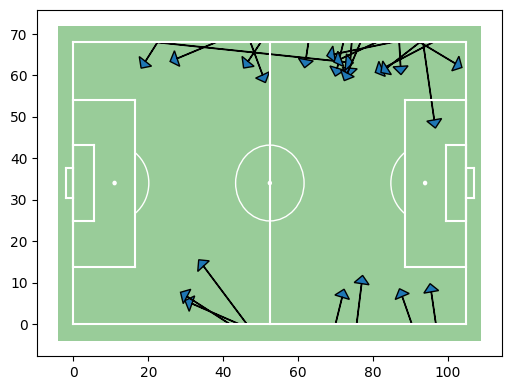

Switzerland
1072


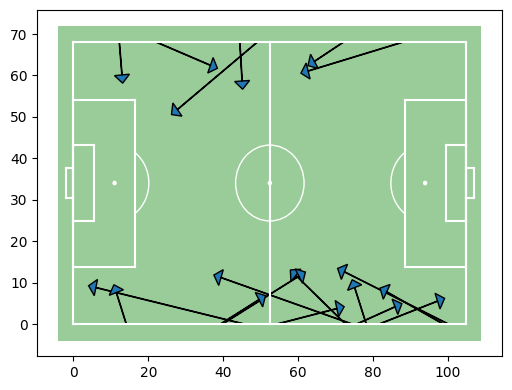

----------------------------------------------
Netherlands
1612


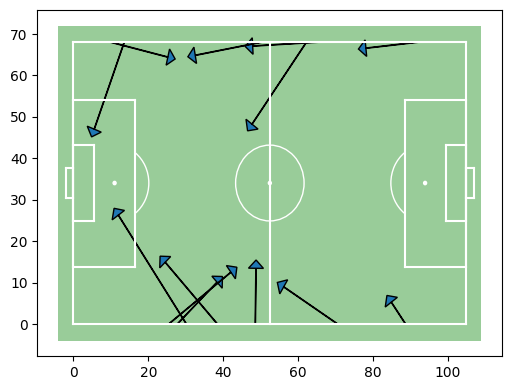

Qatar
948


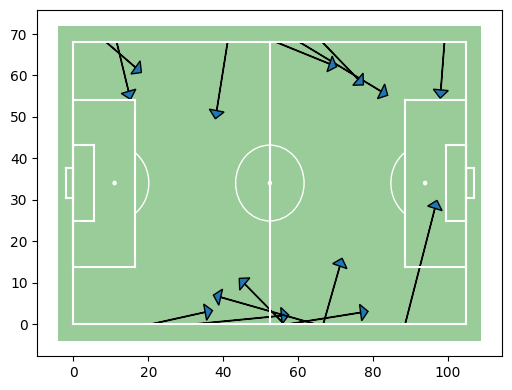

----------------------------------------------
Portugal
969


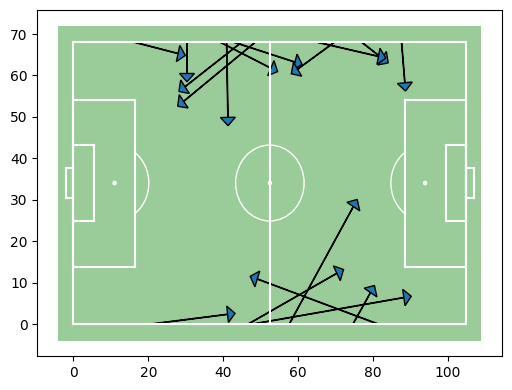

Switzerland
1054


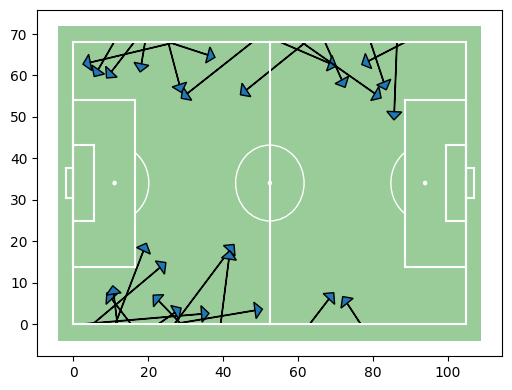

----------------------------------------------
England
1293


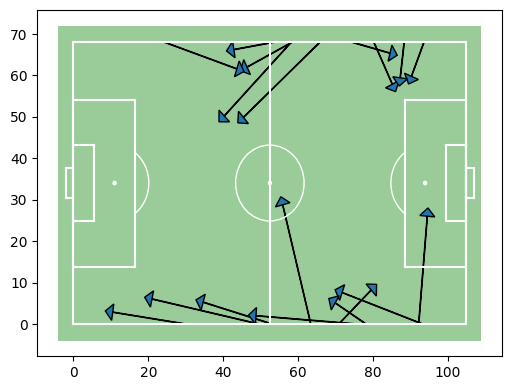

Senegal
794


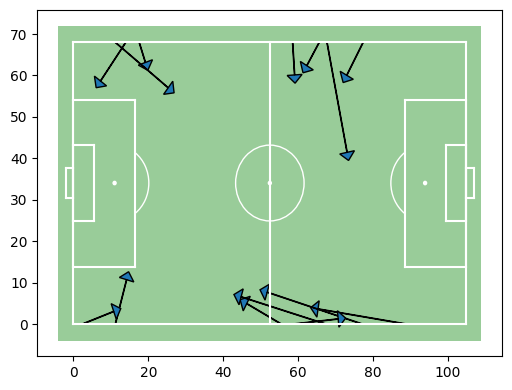

----------------------------------------------
Croatia
1054


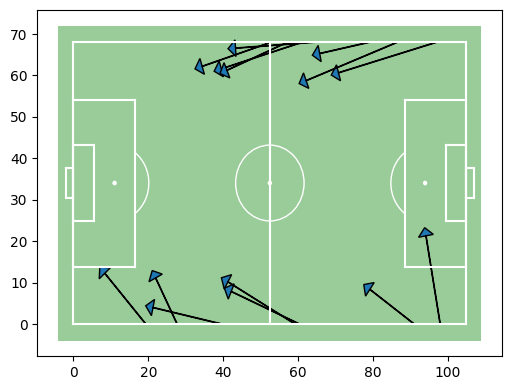

Morocco
1053


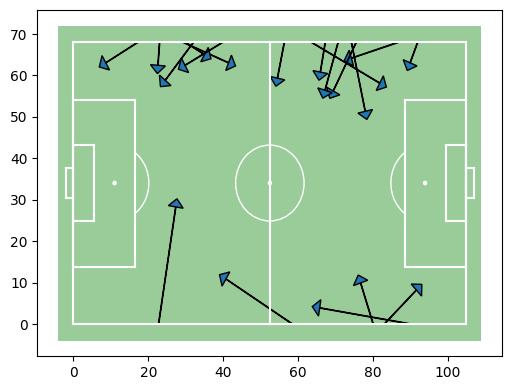

----------------------------------------------
Argentina
892


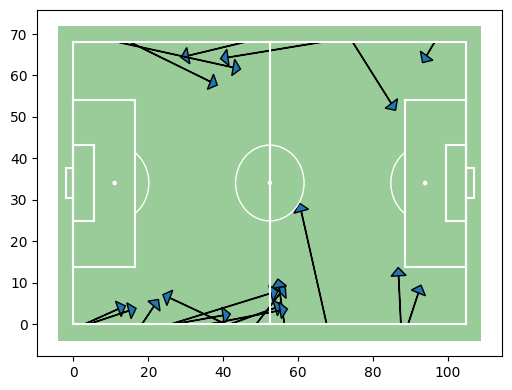

Croatia
1375


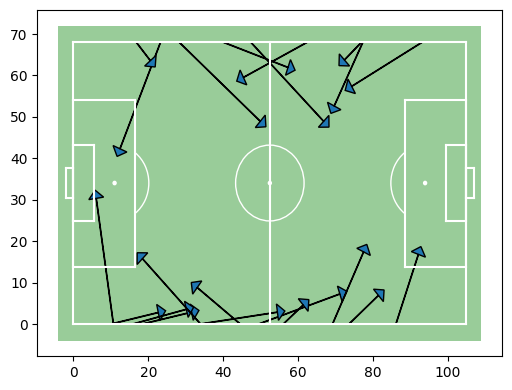

----------------------------------------------
England
1081


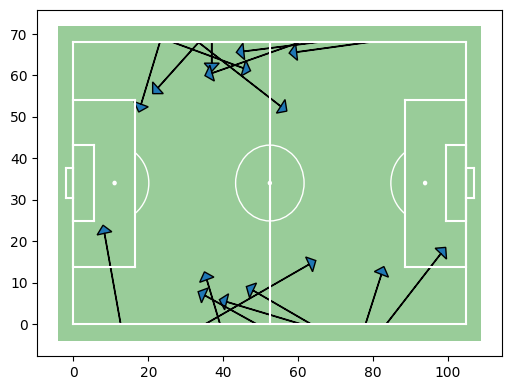

France
808


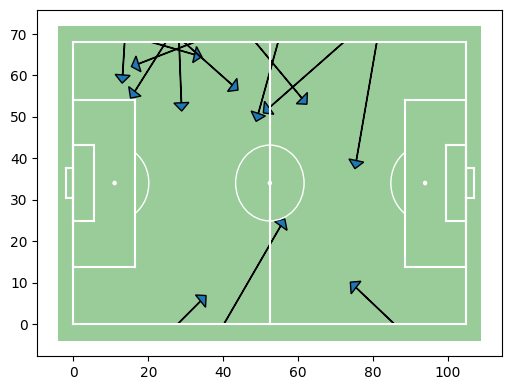

----------------------------------------------
France
848


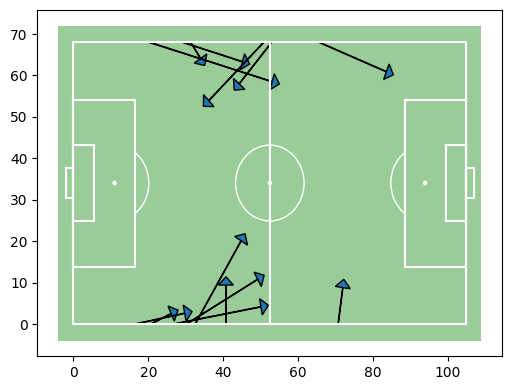

Morocco
1244


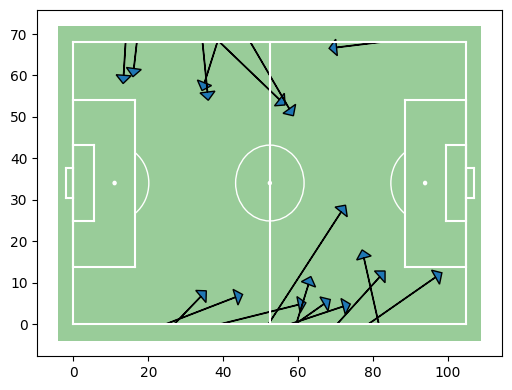

----------------------------------------------
Croatia
1577


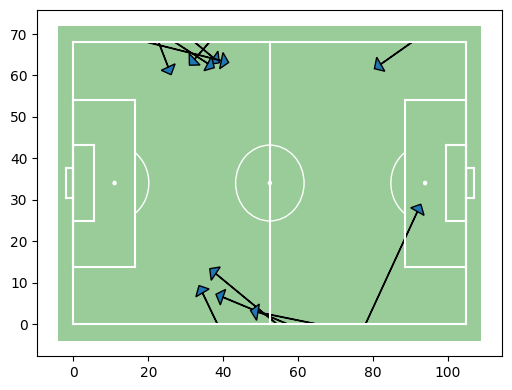

Brazil
1517


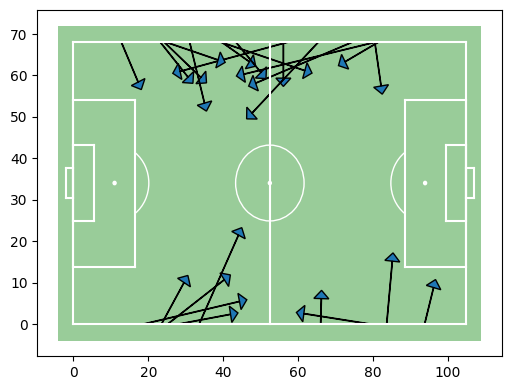

----------------------------------------------
Morocco
773


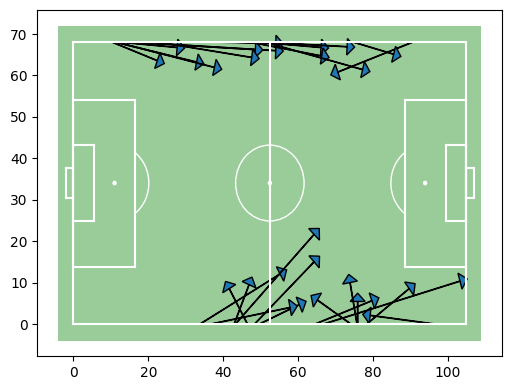

Spain
2084


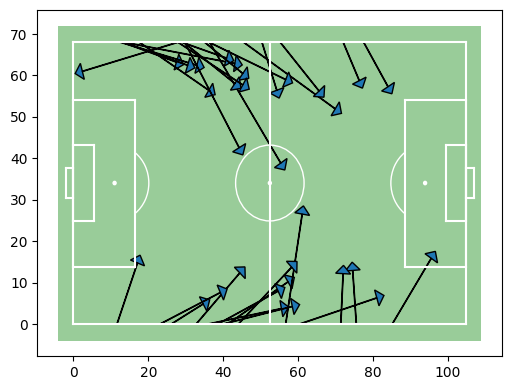

----------------------------------------------
Japan
1138


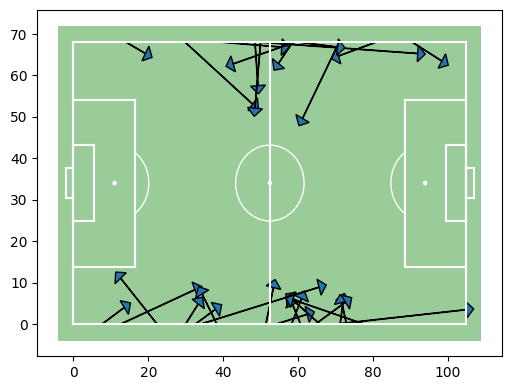

Croatia
1527


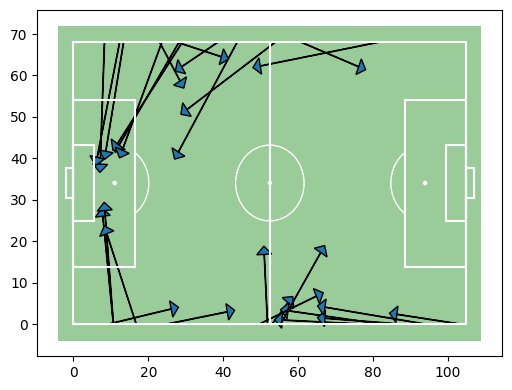

----------------------------------------------
Brazil
1279


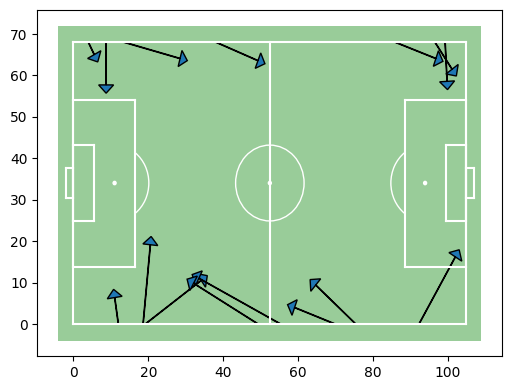

South Korea
1136


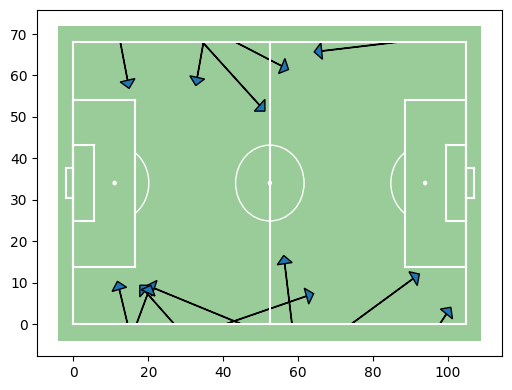

----------------------------------------------
France
1179


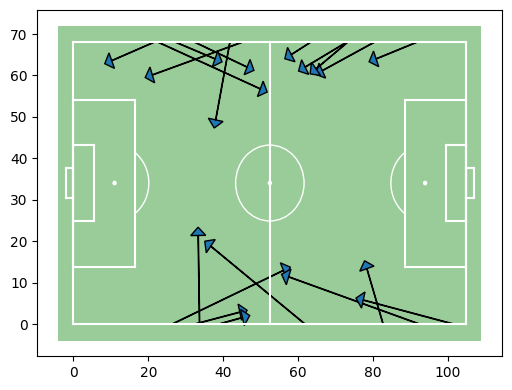

Poland
1007


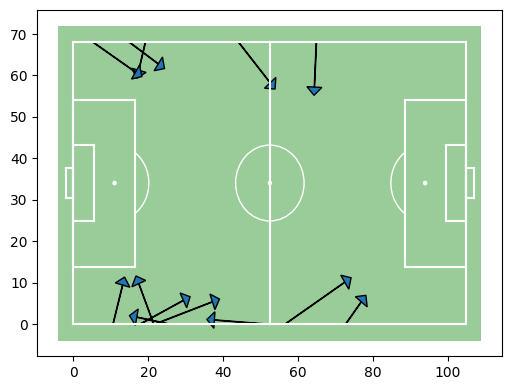

----------------------------------------------
Netherlands
889


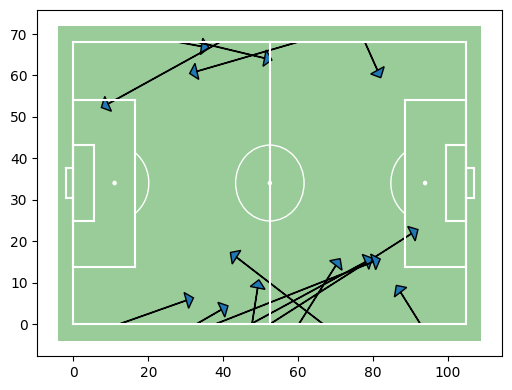

United States
1261


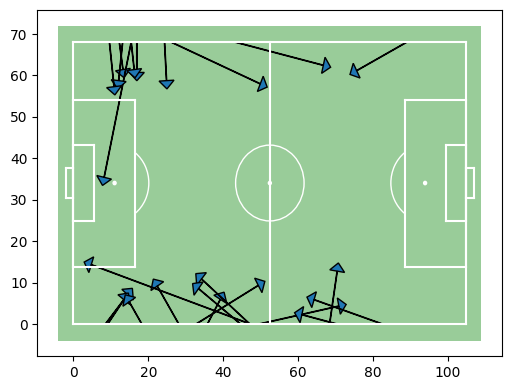

----------------------------------------------
Portugal
1247


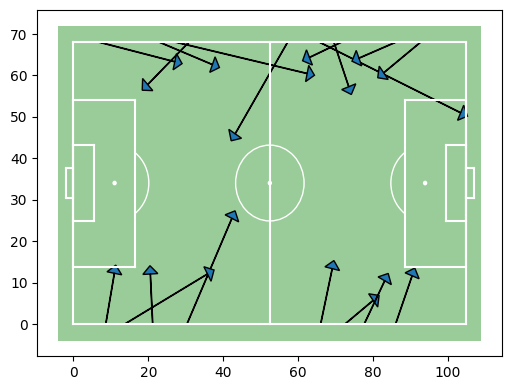

Uruguay
827


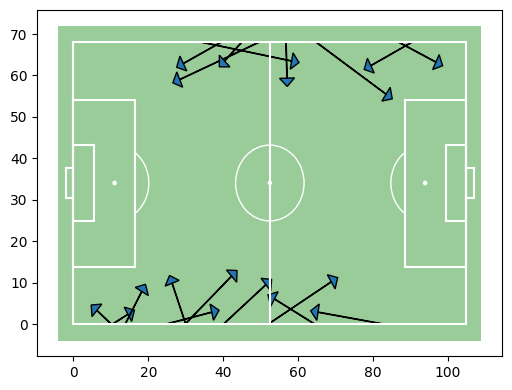

----------------------------------------------
Spain
1326


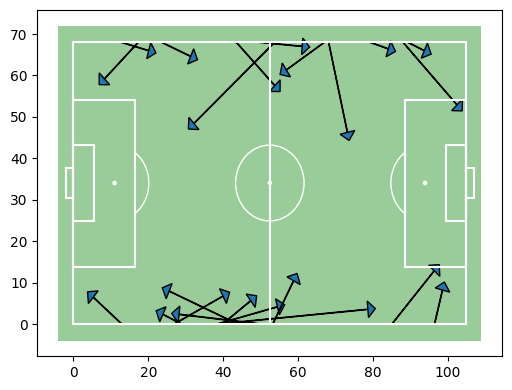

Germany
804


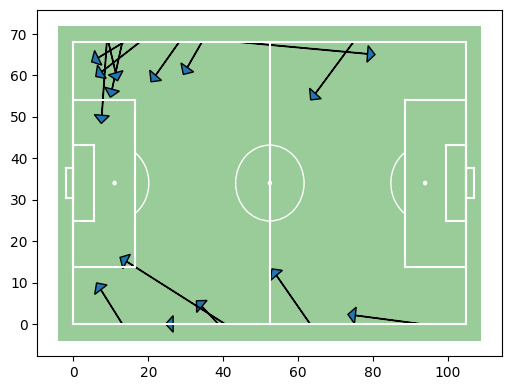

----------------------------------------------
Cameroon
793


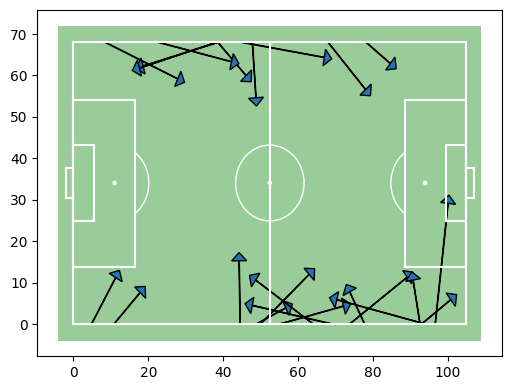

Serbia
1115


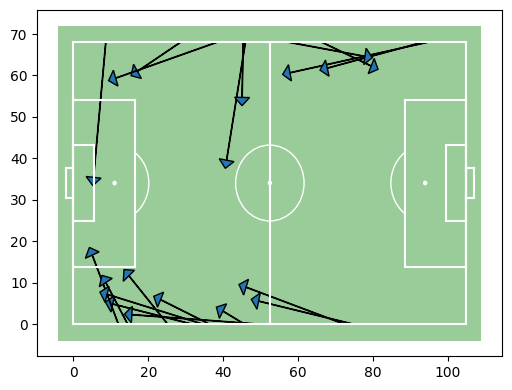

----------------------------------------------
Japan
1275


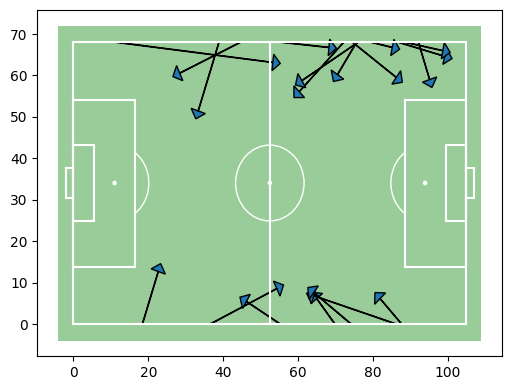

Costa Rica
944


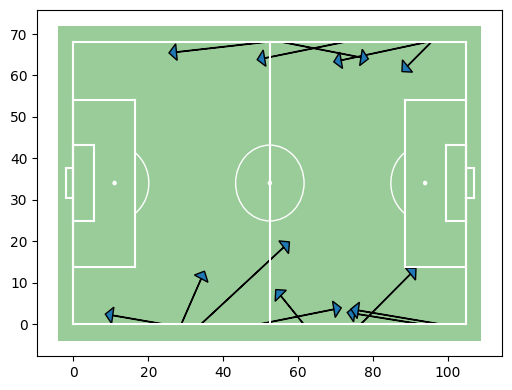

----------------------------------------------
Belgium
1399


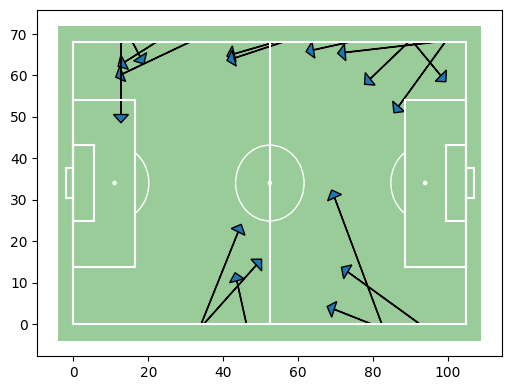

Morocco
750


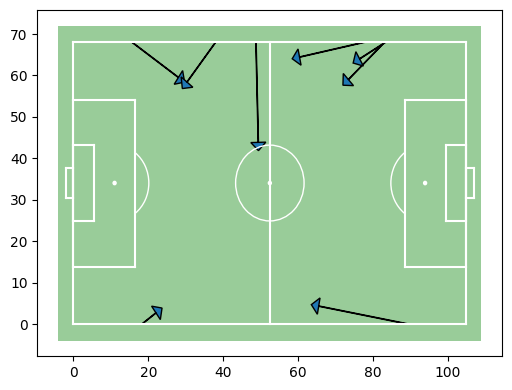

----------------------------------------------
Germany
1559


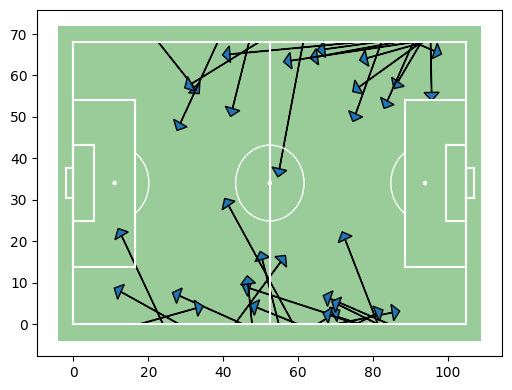

Japan
622


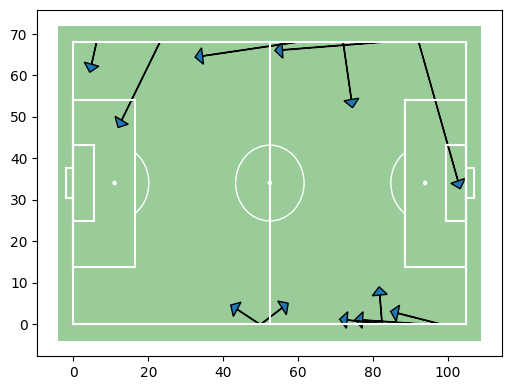

----------------------------------------------
United States
1263


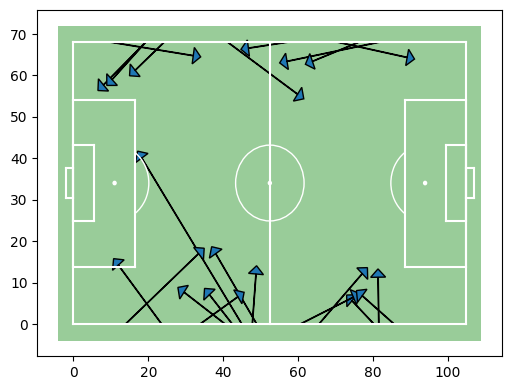

Wales
916


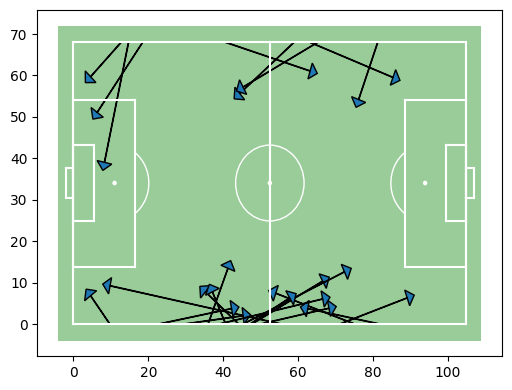

----------------------------------------------
Qatar
955


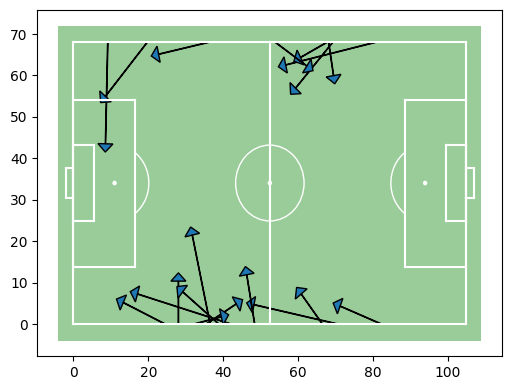

Ecuador
1000


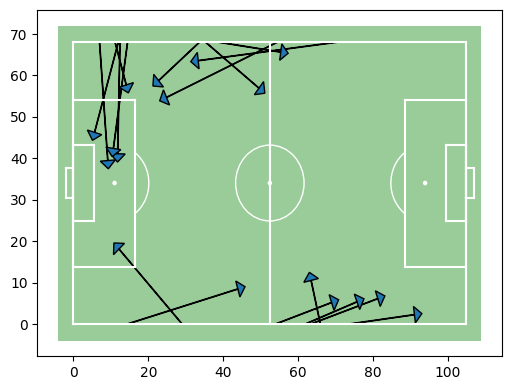

----------------------------------------------
Qatar
933


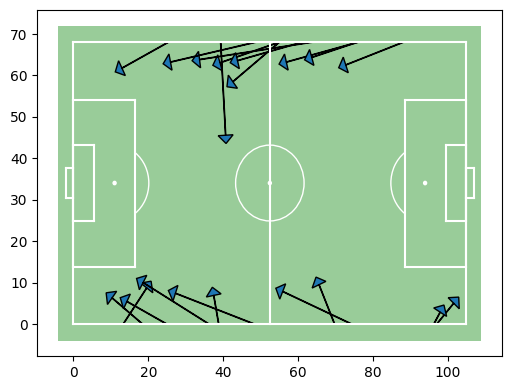

Senegal
1116


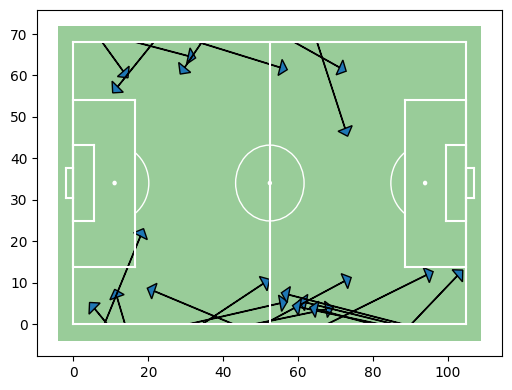

----------------------------------------------
Argentina
1275


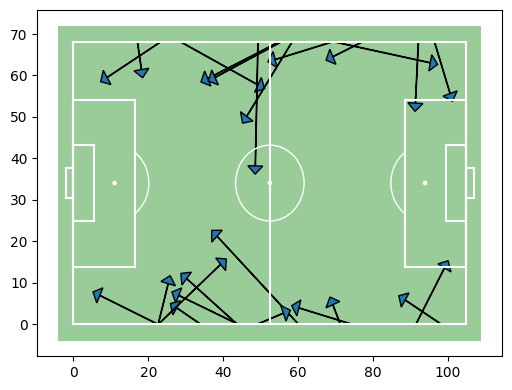

Saudi Arabia
673


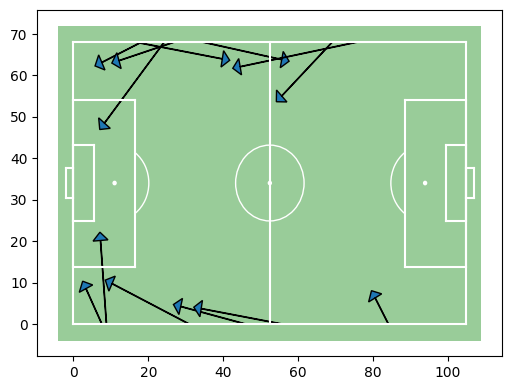

----------------------------------------------
South Korea
1186


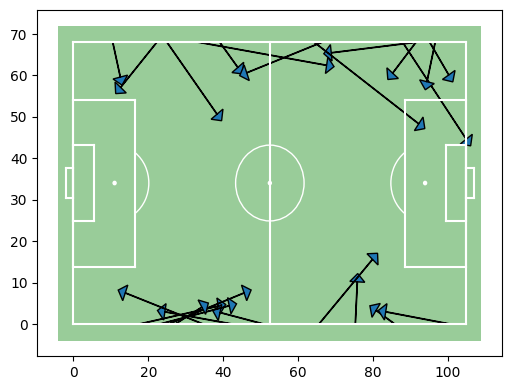

Ghana
749


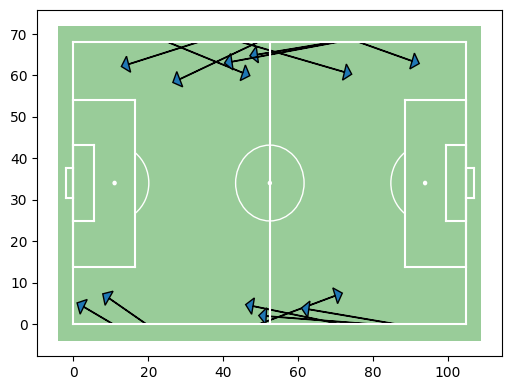

----------------------------------------------
Portugal
1305


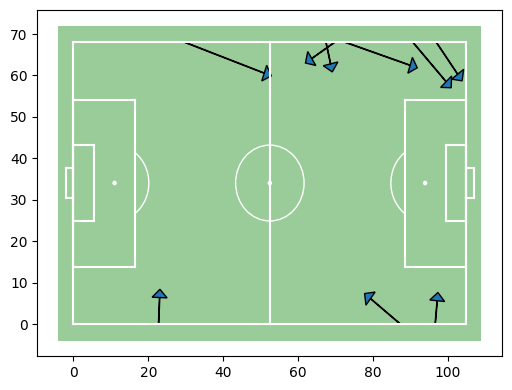

Ghana
877


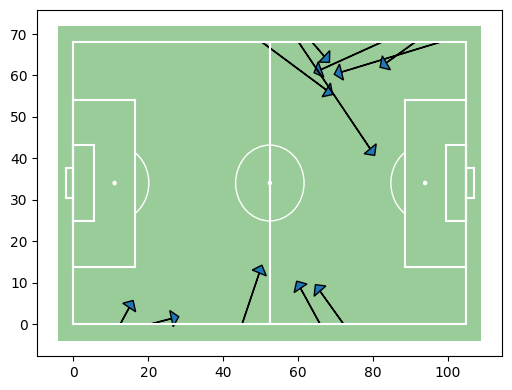

----------------------------------------------
Poland
665


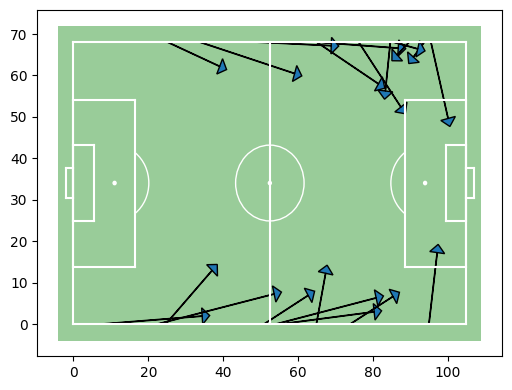

Saudi Arabia
1172


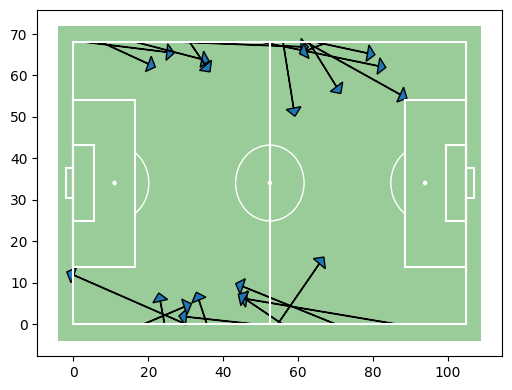

----------------------------------------------
Croatia
1196


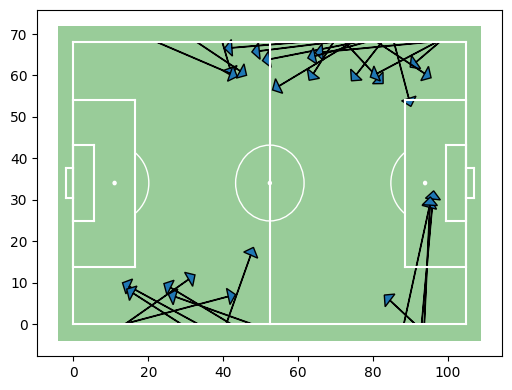

Belgium
1249


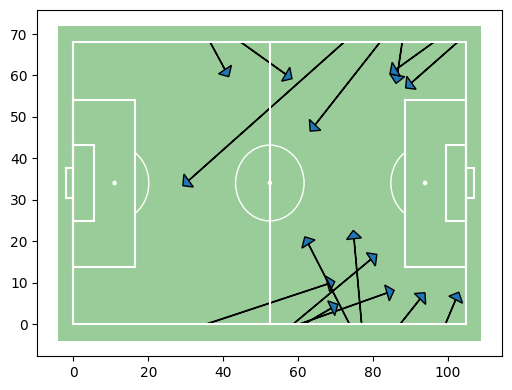

----------------------------------------------
Ghana
1055


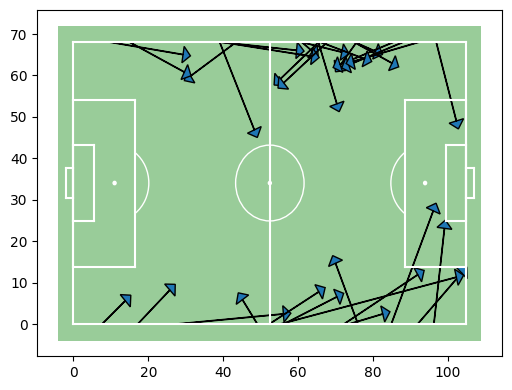

Uruguay
945


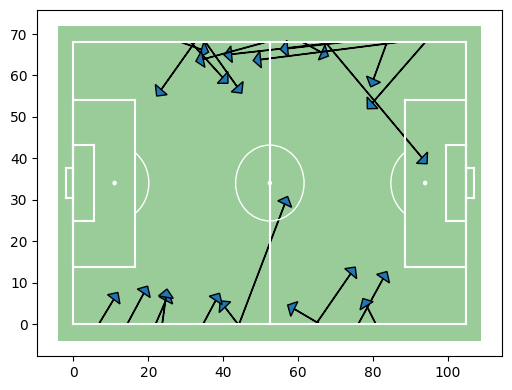

----------------------------------------------
Costa Rica
796


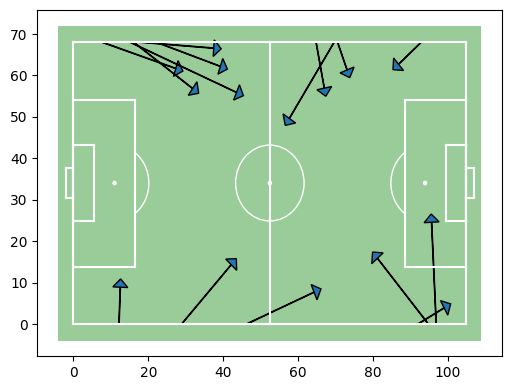

Germany
1503


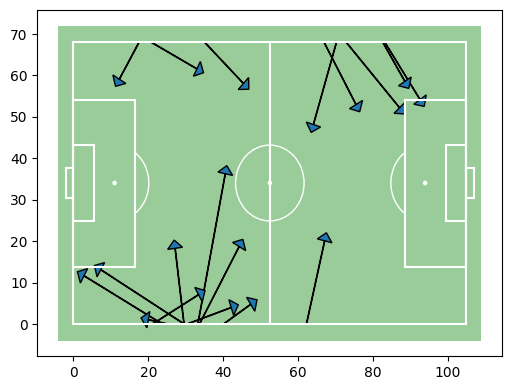

----------------------------------------------
Spain
2151


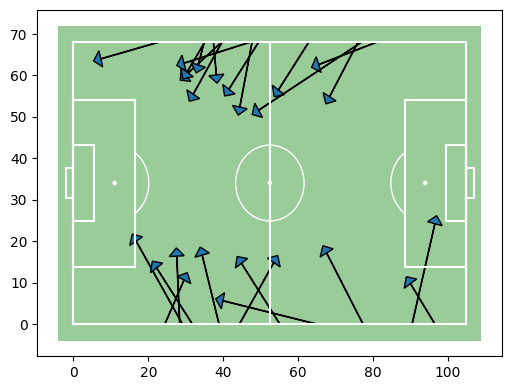

Costa Rica
530


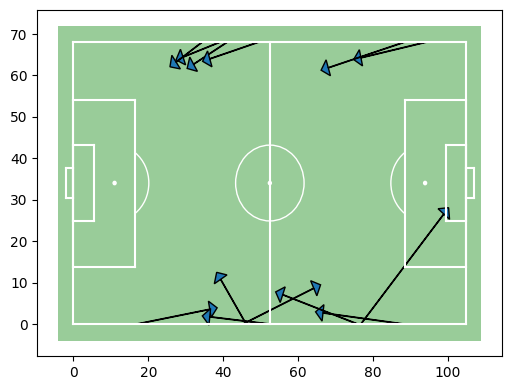

----------------------------------------------
Switzerland
1065


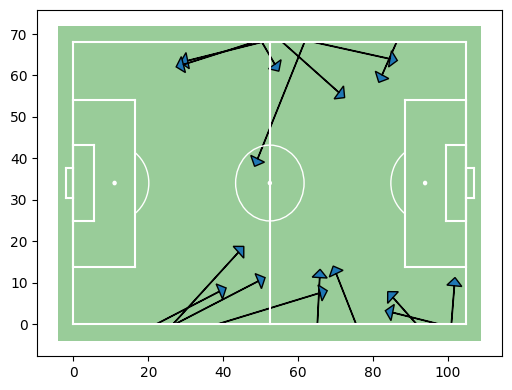

Cameroon
1066


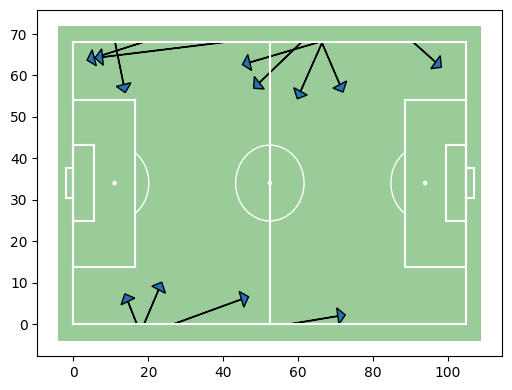

----------------------------------------------
Senegal
888


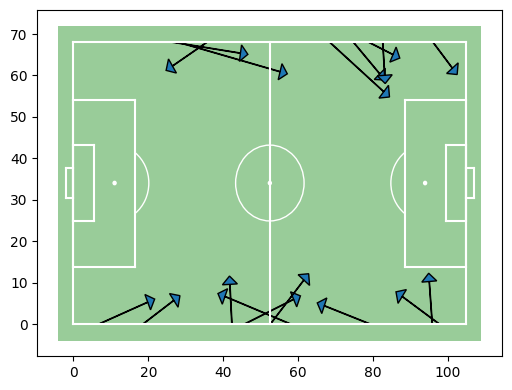

Netherlands
942


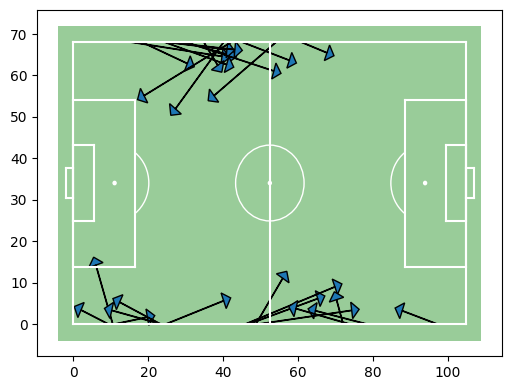

----------------------------------------------
Croatia
1063


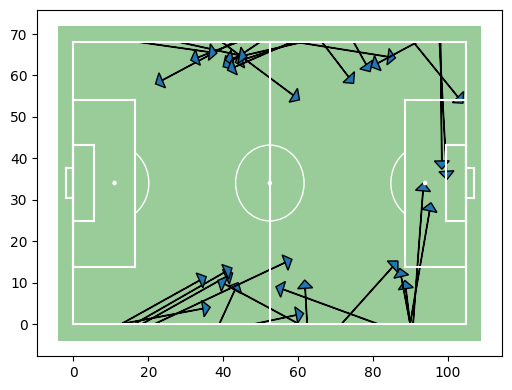

Canada
1119


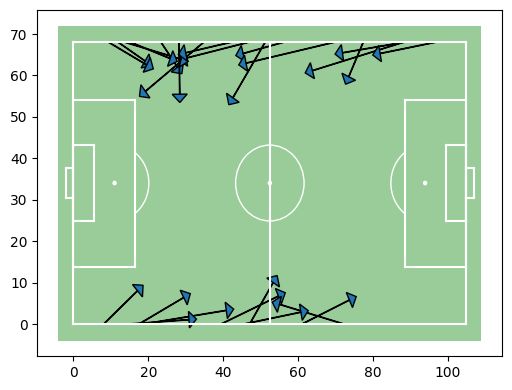

----------------------------------------------
Cameroon
700


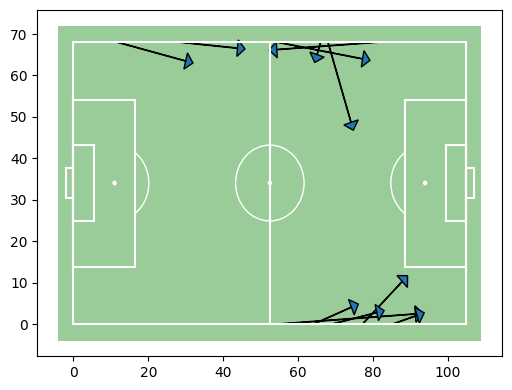

Brazil
1188


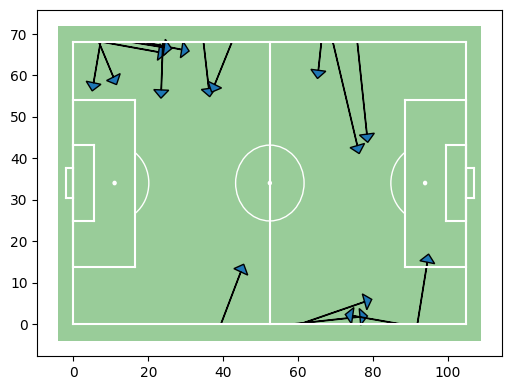

----------------------------------------------
France
1482


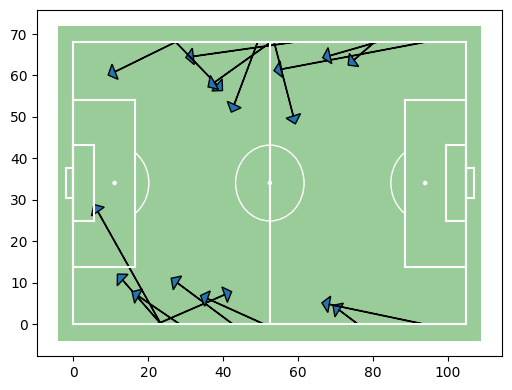

Australia
941


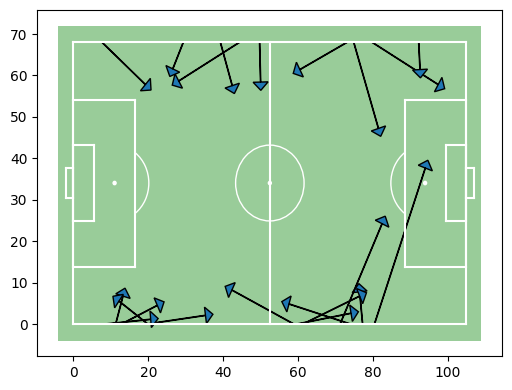

----------------------------------------------
Iran
1011


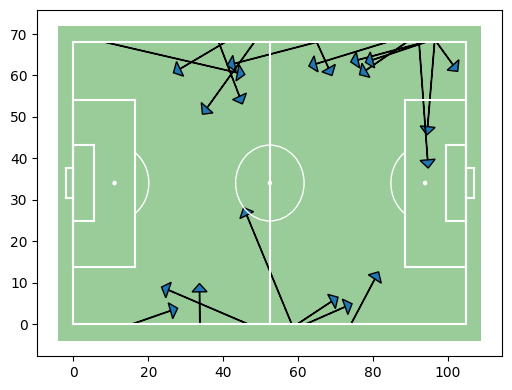

United States
1081


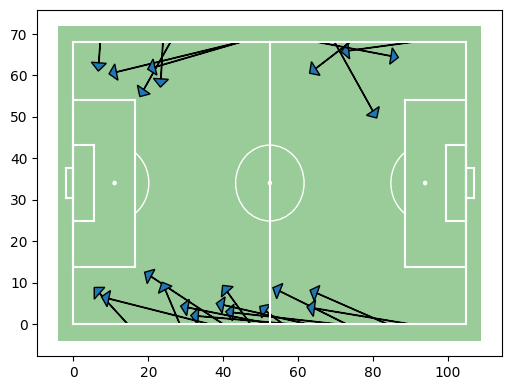

----------------------------------------------
Morocco
844


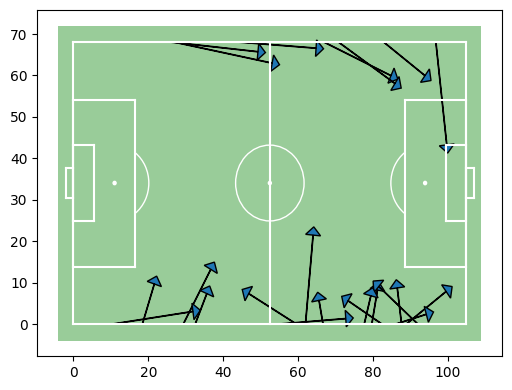

Croatia
1363


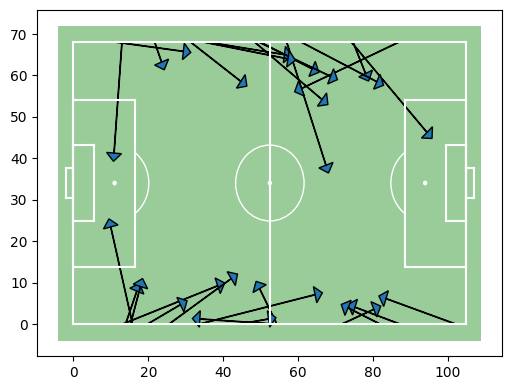

----------------------------------------------
Canada
1138


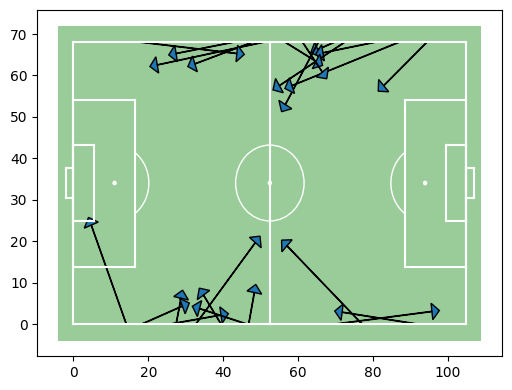

Morocco
855


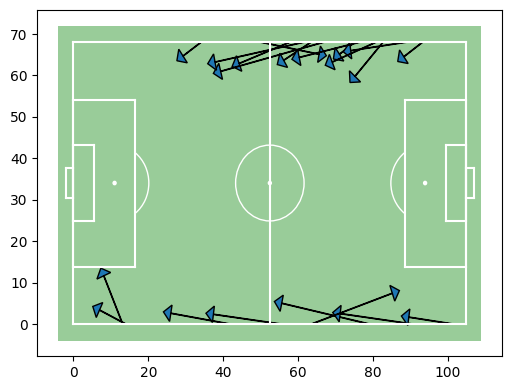

----------------------------------------------
Tunisia
800


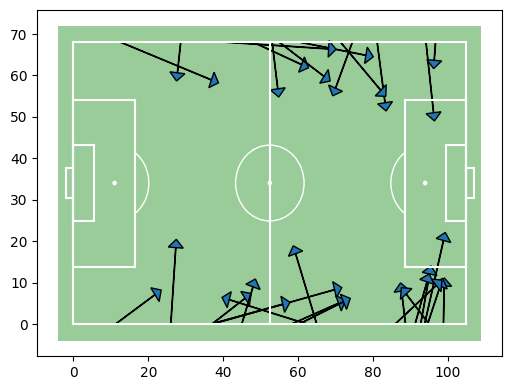

France
1394


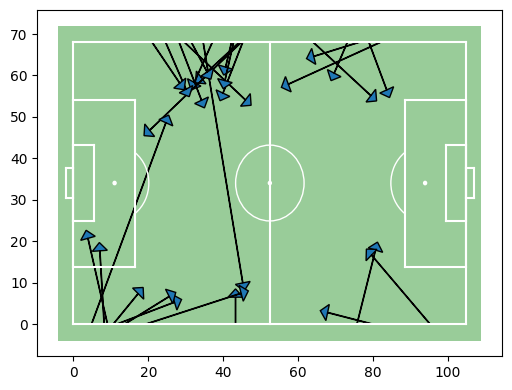

----------------------------------------------
Netherlands
1071


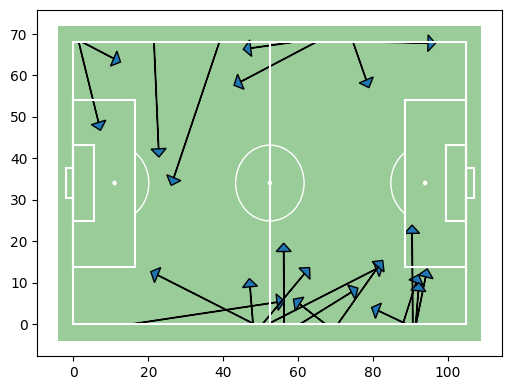

Ecuador
947


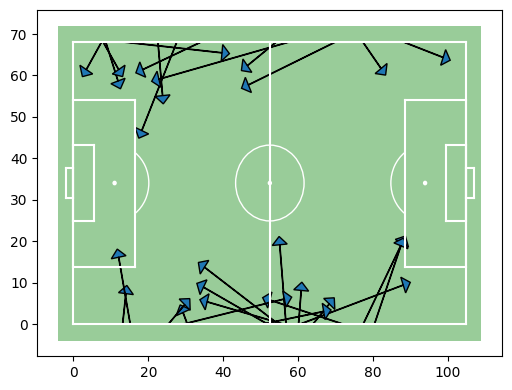

----------------------------------------------
Wales
1106


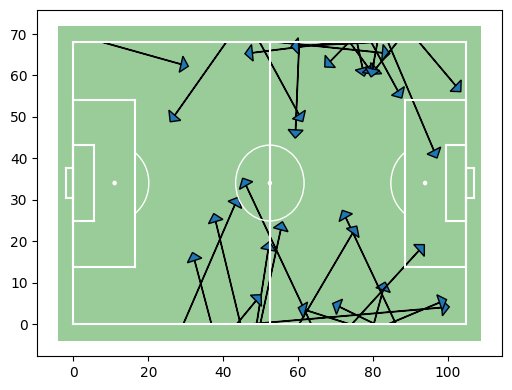

Iran
726


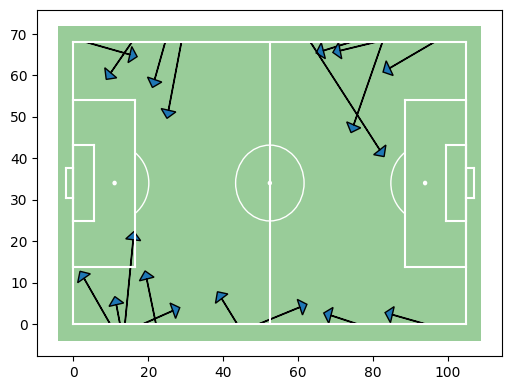

----------------------------------------------
England
1125


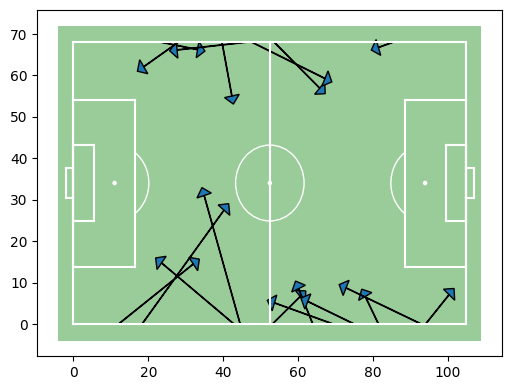

United States
928


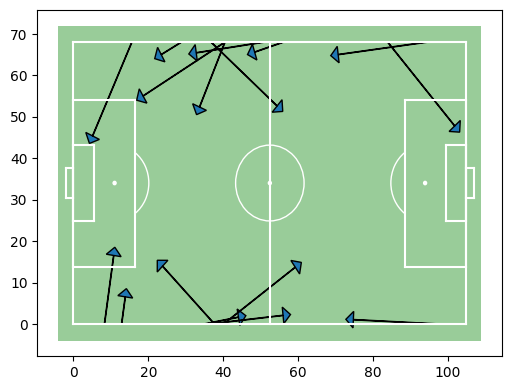

----------------------------------------------
England
1601


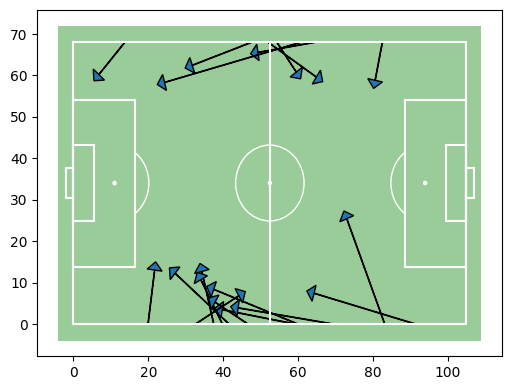

Iran
557


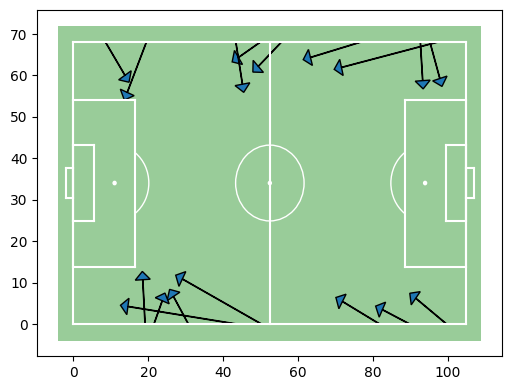

----------------------------------------------
Belgium
1098


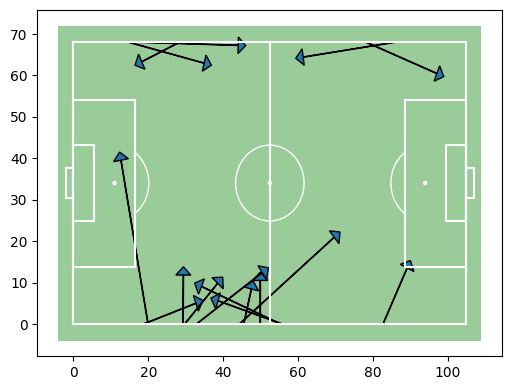

Canada
1015


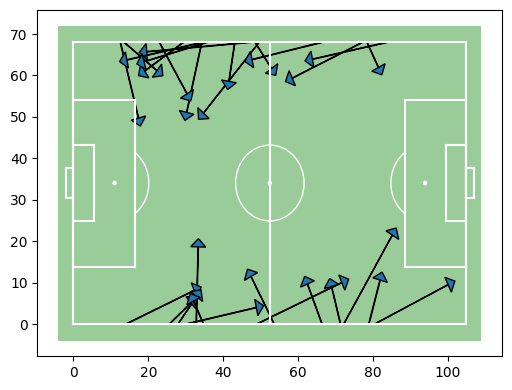

----------------------------------------------
Mexico
1117


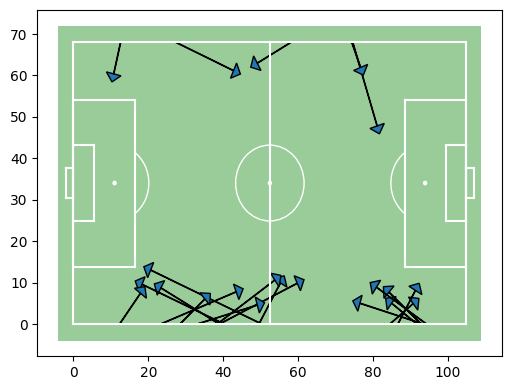

Poland
733


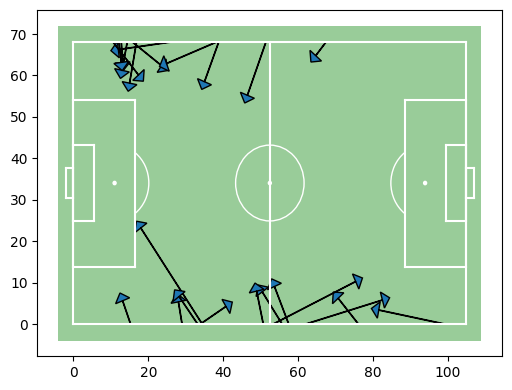

----------------------------------------------
South Korea
770


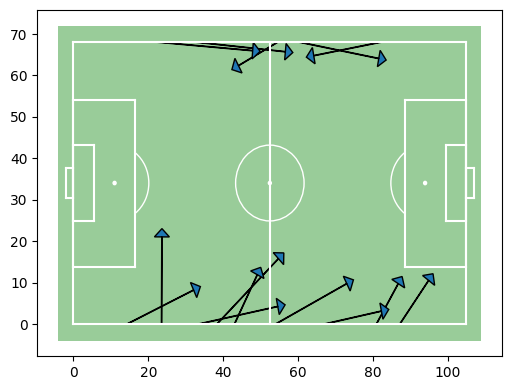

Portugal
1247


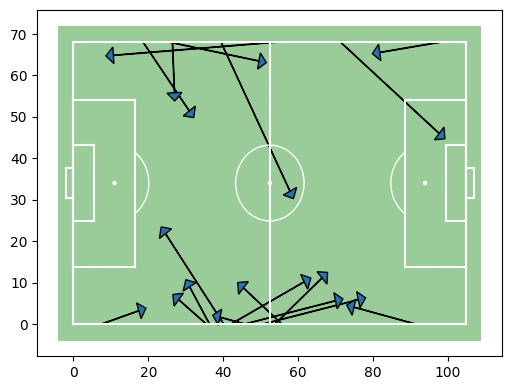

----------------------------------------------
Wales
688


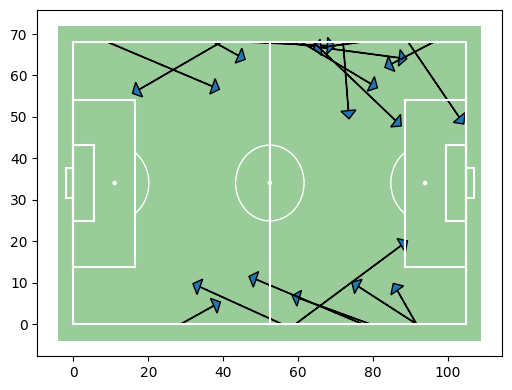

England
1255


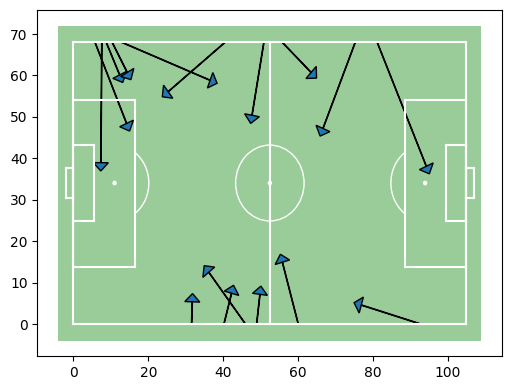

----------------------------------------------
Japan
511


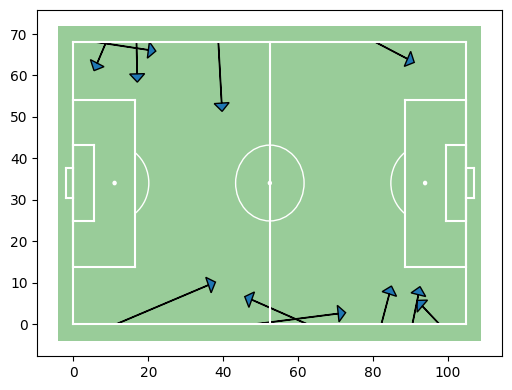

Spain
2132


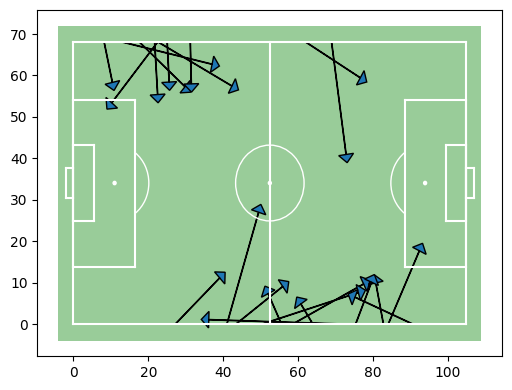

----------------------------------------------
Denmark
1323


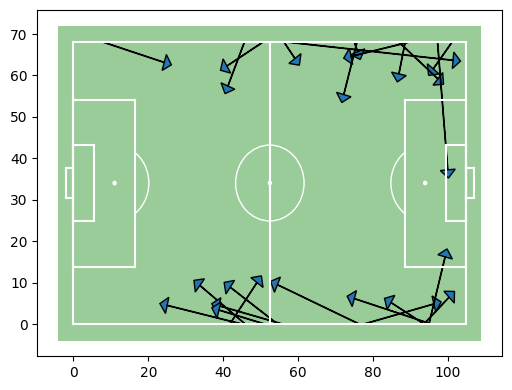

Tunisia
891


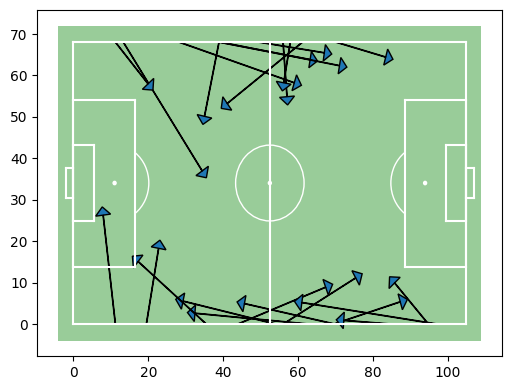

In [52]:
def drawThrowIn(df_all_actions, game_id):
    matplotsoccer.field("green",figsize=6, show=False)
    df_all_actions = (
      spadl
      .add_names(df_all_actions)  # add actiontype and result names
      .merge(SBL.teams(game_id=game_id), how='left')  # add team names
      .merge(SBL.players(game_id=game_id), how='left')  # add player names
    )
    local_throw_in_actions = df_all_actions[(df_all_actions['type_name'] == 'throw_in')]
    for index, item in  local_throw_in_actions.iterrows():
        plt.arrow(item['start_x'], item['start_y'], item['end_x'] - item['start_x'], item['end_y'] - item['start_y'], width=0.1, head_width=4, head_length=2)
    plt.axis("on")
    plt.show()

# for index, game in temp_df_games.iterrows():
for index, game in df_games.iterrows():
    df_local_events = SBL.events(game_id=game.name)
    df_all_actions = spadl.statsbomb.convert_to_actions(df_local_events, game['home_team_id'])
    df_home_actions = df_all_actions[df_all_actions['team_id'] == game['home_team_id']]
    df_away_actions = df_all_actions[df_all_actions['team_id'] == game['away_team_id']]
    print('----------------------------------------------')
    print(game['home_team_name'])
    print(len(df_home_actions))
    drawThrowIn(df_home_actions, game.name)
    print(game['away_team_name'])
    print(len(df_away_actions))
    drawThrowIn(df_away_actions, game.name)
#     print(df_home_actions.head()

## なんとなく思ったこと

- 「スローインが少ない」ということはどういうことを意味しているのだろう？（Japan（vs Spain））
- ピッチの中央に送るスローインってどんなのだろう？終了間際、勝ってる方が完全に引いている状態ならまあわかるが、それ意外だと？？
- 左右のスローインの位置（自分ゴール <-> 相手ゴール）がかなり異なるのはどういうことを意味しているのだろう？（Spain（vs Japan））

In [64]:
for index, game in df_games.iterrows():
    game_id = game.name
    df_local_events = SBL.events(game_id=game.name)
    df_all_actions = spadl.statsbomb.convert_to_actions(df_local_events, game['home_team_id'])
    df_home_actions = df_all_actions[df_all_actions['team_id'] == game['home_team_id']]
    df_away_actions = df_all_actions[df_all_actions['team_id'] == game['away_team_id']]
    df_all_actions = (
      spadl
      .add_names(df_all_actions)  # add actiontype and result names
      .merge(SBL.teams(game_id=game_id), how='left')  # add team names
      .merge(SBL.players(game_id=game_id), how='left')  # add player names
    )
    local_throw_in_actions = df_all_actions[(df_all_actions['type_name'] == 'throw_in')]
    if not 'ddddd' in locals():
        ddddd = pd.DataFrame(columns=local_throw_in_actions.columns)
    ddddd = pd.concat([ddddd, local_throw_in_actions])

df_all_matches_throwin was initialized
(44, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(91, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(150, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(189, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(249, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(290, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(338, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(388, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(426, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(474, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(523, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(557, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(601, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(641, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(682, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(709, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(752, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(784, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(817, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(857, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(886, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(916, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(951, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1011, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1067, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1095, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1127, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1164, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1200, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1237, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1279, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1311, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1336, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1381, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1426, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1462, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1503, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1540, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1576, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1596, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1636, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1678, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1733, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1766, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1803, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1831, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1875, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1931, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1958, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(1996, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2038, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2088, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2131, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2189, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2239, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2287, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2321, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2356, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2400, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2444, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2476, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2510, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


(2543, 25)


/var/folders/bc/b1w3t34n7r901ck7mnkxfkpr0000gp/T/ipykernel_12060/1621412988.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  ddddd = pd.concat([ddddd, local_throw_in_actions])


In [65]:
ddddd.shape

(2590, 25)

In [66]:
ddddd.head()

game_id                     original_event_id period_id  time_seconds  \
19   3857256  ef17ab18-f7bf-4d6e-90a8-b9c7b53050a2         1          46.0   
45   3857256  dc3122fb-320f-4144-bc87-ba4b8bcf892a         1         103.0   
130  3857256  d3e894d0-11e3-472e-adb2-f2a83e232ecd         1         375.0   
152  3857256  f5493cd7-c71a-4aa6-974a-49ad77a53366         1         432.0   
162  3857256  151cb913-02d4-41ba-acdf-69aacd638040         1         465.0   

    team_id  player_id    start_x  start_y      end_x      end_y type_id  \
19      786     6318.0  16.764706      0.0  19.235294   7.144304       2   
45      786     5591.0  68.823529     68.0  39.794118  66.278481       2   
130     773     5544.0  39.794118      0.0  59.647059   5.681013       2   
152     773     7796.0  55.235294     68.0  68.558824  49.407595       2   
162     786     5591.0  36.352941     68.0  18.529412  60.511392       2   

    result_id bodypart_id action_id type_name result_name bodypart_name  \
19          1           0        19  throw_in     success          foot   
45          1           0        45  throw_in     success          foot   
130         1           0       130  throw_in     success          foot   
152         1           0       152  throw_in     success          foot   
162         1           0       162  throw_in     success          foot   

       team_name                   player_name           nickname  \
19        Serbia              Andrija Živković               None   
45        Serbia                  Filip Kostić               None   
130  Switzerland  Ricardo Iván Rodríguez Araya  Ricardo Rodríguez   
152  Switzerland                 Silvan Widmer               None   
162       Serbia                  Filip Kostić               None   

    jersey_number is_starter starting_position_id starting_position_name  \
19             14       True                    7        Right Wing Back   
45             17       True                    8         Left Wing Back   
130            13       True                    6              Left Back   
152             3       True                    2             Right Back   
162            17       True                    8         Left Wing Back   

    minutes_played  
19              79  
45             102  
130            102  
152            102  
162            102

In [77]:
throwin_size = ddddd.groupby(['game_id', 'team_id']).size()
# throwin_size.plot.bar()
throwin_size.values

array([24, 23, 22, 11, 22, 22, 27, 32, 24, 15, 19, 23, 23, 26, 16, 18, 18,
       14, 15, 22, 18, 16, 23, 21, 22, 22, 18, 23, 16, 28, 18, 23, 18, 18,
       18, 17, 18, 16, 18, 30, 22, 28, 28, 30, 20, 23, 28, 22, 20, 22, 17,
       21, 16, 11, 31, 25, 23, 22, 17,  8, 33, 12, 17, 27, 17, 19, 22, 28,
       39, 21, 21, 19, 16, 12, 24, 13, 18, 15, 23, 32, 13, 14, 19, 13, 15,
       27, 20, 20,  9, 11, 23, 13, 24, 13, 21, 20, 14, 23, 18, 14, 24, 23,
       19, 13, 29, 27, 32, 28, 15, 13, 26, 17, 19, 29, 16, 13, 24, 11, 27,
       11, 19, 21, 13, 17, 14, 19, 22, 26])

# スローインの数の分布

(array([ 2.,  0.,  5.,  2., 14.,  5.,  7.,  7., 20.,  5.,  6., 12., 18.,
         1.,  3.,  5.,  8.,  2.,  1.,  3.,  1.,  0.,  0.,  0.,  1.]),
 array([ 8.  ,  9.24, 10.48, 11.72, 12.96, 14.2 , 15.44, 16.68, 17.92,
        19.16, 20.4 , 21.64, 22.88, 24.12, 25.36, 26.6 , 27.84, 29.08,
        30.32, 31.56, 32.8 , 34.04, 35.28, 36.52, 37.76, 39.  ]),
 <BarContainer object of 25 artists>)

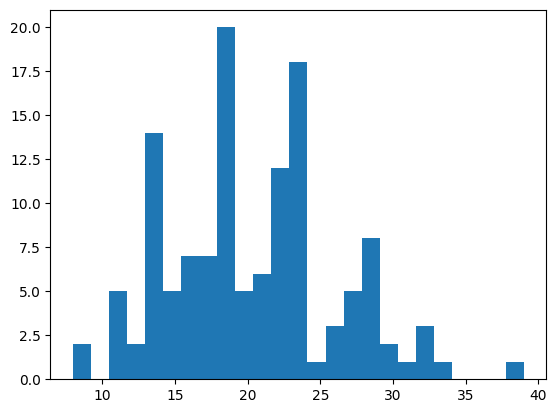

In [87]:
plt.hist(throwin_size, bins=25)

In [88]:
ddddd.groupby(['team_id']).size()

team_id
768      86
770      66
771     134
772     100
773      82
776      73
777      92
778      71
779     151
780      89
781     102
782      48
783      63
785     159
786      56
787      70
788     125
789      72
791      78
792      97
794      63
795      41
797      55
799      59
907      71
941     105
1833     76
1839     83
2722     46
3565     68
3566     53
4885     56
dtype: int64

In [102]:
# print(type(df_games.groupby(['home_team_id']).size()))
# print(df_games.groupby(['home_team_id']).size())
# print(df_games.groupby(['away_team_id']).size())
# df_games.head()
game_count = df_games.groupby(['home_team_id']).size() + df_games.groupby(['away_team_id']).size()

In [110]:
# game_count = game_count.rename(columns={'team_id': 'game_count'})
game_count.sort_values()

home_team_id
4885    3
3566    3
786     3
795     3
783     3
782     3
797     3
799     3
907     3
1833    3
777     3
776     3
2722    3
3565    3
770     3
794     3
1839    4
792     4
787     4
789     4
778     4
773     4
772     4
791     4
781     5
780     5
941     5
768     5
788     7
785     7
779     7
771     7
dtype: int64

In [120]:
df_throwin_avg = pd.concat([ddddd.groupby(['team_id']).size(), game_count], axis=1, join='inner')

In [121]:
df_throwin_avg['avg'] = df_throwin_avg[0] / df_throwin_avg[1]

In [123]:
df_throwin_avg.sort_values('avg')

0  1        avg
795    41  3  13.666667
2722   46  3  15.333333
782    48  3  16.000000
768    86  5  17.200000
787    70  4  17.500000
3566   53  3  17.666667
778    71  4  17.750000
780    89  5  17.800000
788   125  7  17.857143
789    72  4  18.000000
797    55  3  18.333333
4885   56  3  18.666667
786    56  3  18.666667
771   134  7  19.142857
791    78  4  19.500000
799    59  3  19.666667
781   102  5  20.400000
773    82  4  20.500000
1839   83  4  20.750000
941   105  5  21.000000
783    63  3  21.000000
794    63  3  21.000000
779   151  7  21.571429
770    66  3  22.000000
3565   68  3  22.666667
785   159  7  22.714286
907    71  3  23.666667
792    97  4  24.250000
776    73  3  24.333333
772   100  4  25.000000
1833   76  3  25.333333
777    92  3  30.666667

In [134]:
df_throwin_avg['country_name'] = df_throwin_avg.index.map(lambda x: team_dic[x])

In [136]:
df_throwin_avg.sort_values('avg')

0  1        avg   country_name
795    41  3  13.666667     Costa Rica
2722   46  3  15.333333       Cameroon
782    48  3  16.000000        Belgium
768    86  5  17.200000        England
787    70  4  17.500000        Senegal
3566   53  3  17.666667          Qatar
778    71  4  17.750000          Japan
780    89  5  17.800000       Portugal
788   125  7  17.857143        Morocco
789    72  4  18.000000         Poland
797    55  3  18.333333           Iran
4885   56  3  18.666667          Ghana
786    56  3  18.666667         Serbia
771   134  7  19.142857         France
791    78  4  19.500000    South Korea
799    59  3  19.666667   Saudi Arabia
781   102  5  20.400000         Brazil
773    82  4  20.500000    Switzerland
1839   83  4  20.750000  United States
941   105  5  21.000000    Netherlands
783    63  3  21.000000        Uruguay
794    63  3  21.000000         Mexico
779   151  7  21.571429      Argentina
770    66  3  22.000000        Germany
3565   68  3  22.666667        Ecuador
785   159  7  22.714286        Croatia
907    71  3  23.666667          Wales
792    97  4  24.250000      Australia
776    73  3  24.333333        Denmark
772   100  4  25.000000          Spain
1833   76  3  25.333333         Canada
777    92  3  30.666667        Tunisia

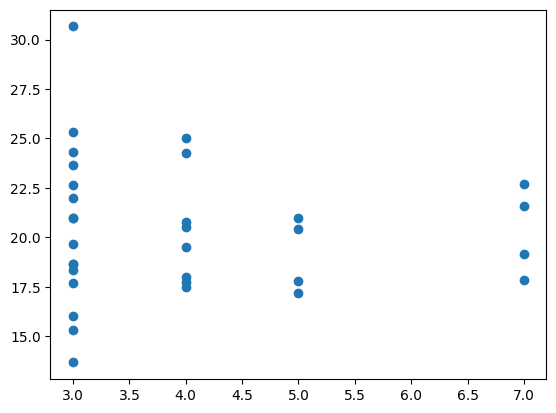

In [137]:
# 試合数（多ければ大きほどいい結果だったと入れる）とスローイン数のマッピングしてみる
plt.scatter(df_throwin_avg[1], df_throwin_avg['avg'])